In [59]:
import numpy as np
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import astroML.stats

from scipy.stats import norm
# from sklearn.neighbors import KernelDensity

from astropy.visualization import hist

Start off on a cloud day.
Implement your weather forecast based on the above probabilities
Run your simulator for N days (with 
)


In [60]:


current_state = "cloudy"

transition_matrix = {
    "clear": {"clear": 0.9, "cloudy": 0.1},
    "cloudy": {"clear": 0.5, "cloudy": 0.5}
}

r = np.random.rand()

if r < transition_matrix[current_state]["clear"]:
    next_state = "clear"
else:
    next_state = "cloudy"

print("Today:", current_state)
print("Random draw:", r)
print("Tomorrow:", next_state)

Today: cloudy
Random draw: 0.4014920380265026
Tomorrow: clear


Prepare a plot with the number of days on the x axis and the cumulative number of, say, sunny days over the number of days so far on the y axis. 

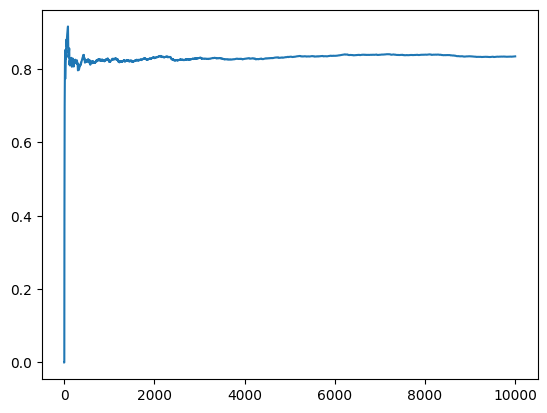

In [61]:
days=10000
current_state = "cloudy"
states = []
counts=[]
clear_days = 0 
for i in range(days):
    r= np.random.rand()
    states.append(current_state)
    if r < transition_matrix[current_state]["clear"]:
        next_state = "clear"
    else:
        next_state = "cloudy"

    if current_state == "clear":
        clear_days += 1  
    
    freq_clear = clear_days / (i + 1)
    counts.append(freq_clear)
    current_state = next_state


plt.plot(counts, label="Frequency of clear days")

(array([6.55263158e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

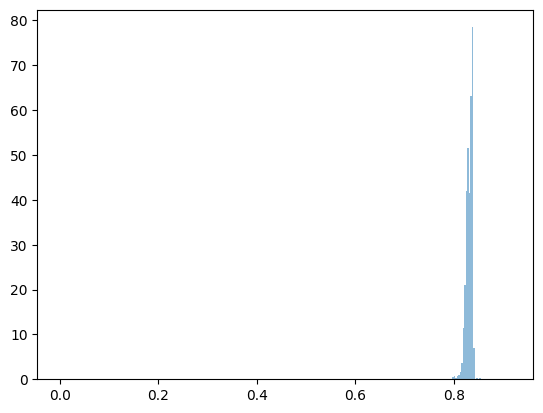

In [62]:

plt.hist(counts, bins=300, density=True, alpha=0.5, label="Histogram of clear days frequency")

Prepare a histogram of the above plot. This reveals the distribution of p(clear)

(array([  5.61974732,   2.80987366,   5.61974732,   8.42962098,
         11.23949464,   8.42962098,   8.42962098,  11.23949464,
         14.0493683 ,  16.85924196,  19.66911562,  19.66911562,
         22.47898928,  25.28886294,  30.90861025,  28.09873659,
         30.90861025,  33.71848391,  22.47898928,  22.47898928,
         33.71848391,  28.09873659,  36.52835757,  36.52835757,
         47.76785221,  36.52835757,  44.95797855,  50.57772587,
         47.76785221,  42.14810489,  44.95797855,  39.33823123,
         42.14810489,  47.76785221,  42.14810489,  39.33823123,
         53.38759953,  53.38759953,  47.76785221,  59.00734685,
         50.57772587,  53.38759953,  56.19747319,  70.24684149,
         73.05671515,  64.62709417,  67.43696783,  81.48633612,
         75.86658881,  75.86658881,  92.72583076,  75.86658881,
         87.10608344,  67.43696783,  92.72583076,  81.48633612,
         67.43696783,  81.48633612,  78.67646246,  78.67646246,
         64.62709417,  53.38759953,  59.

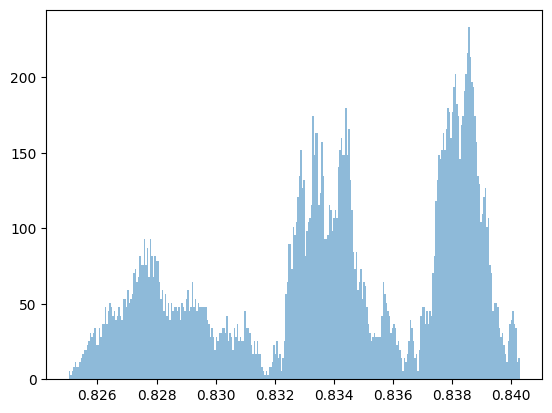

In [63]:
warmup=3000
plt.hist(counts[warmup:], bins=300, density=True, alpha=0.5, label="Histogram of clear days frequency (after warmup)")

Use a summary statistics to determine the most likely value and an error on our estimate.


In [66]:
median= np.median(counts)
print("Median frequency of clear days:", median)
dispersion=astroML.stats.sigmaG(counts
                                )
print("Dispersion of frequency of clear days:", dispersion)

Median frequency of clear days: 0.8328214786788686
Dispersion of frequency of clear days: 0.007537761870602119


In [65]:
median = np.median(counts[warmup:])
print("Median frequency of clear days after warmup:", median)
dispersion=astroML.stats.sigmaG(counts[warmup:])
print("Dispersion of frequency of clear days after warmup:", dispersion)

Median frequency of clear days after warmup: 0.8342562854048053
Dispersion of frequency of clear days after warmup: 0.005339734533567841
